In [1]:
import numpy as np
import pandas as pd

from GP_Regular import GP_regression, plot_gp
np.random.seed(36)

In [2]:
# Load simple dataset from www.gatsby.ucl.ac.uk/∼snelson/ 
# 1D 200 inputs points, 300 test points
trainset = pd.read_csv("1D_train.csv").to_numpy()

testset = pd.read_csv("1D_test.csv").to_numpy()

# Get the X and Y
X_train = np.expand_dims(trainset[:,0],axis=1)
Y_train = np.expand_dims(trainset[:,1],axis=1)
X_test =  np.expand_dims(testset[:,0],axis=1)

In [3]:
GP = GP_regression()
GP.fit(X_train, Y_train, params0=np.array([1.0,1.0,0.5]),noise_estimation=True)

print("Length: ", GP.theta[0], ", Scale: ", GP.theta[1], ", Noise: ", GP.noise)

Optimization terminated successfully.
         Current function value: 56.000521
         Iterations: 14
         Function evaluations: 88
         Gradient evaluations: 22
Final negative log marginal likelihood: [56.00052088]
Length:  0.6116924976875553 , Scale:  0.8764021579521777 , Noise:  -0.2823460796417939


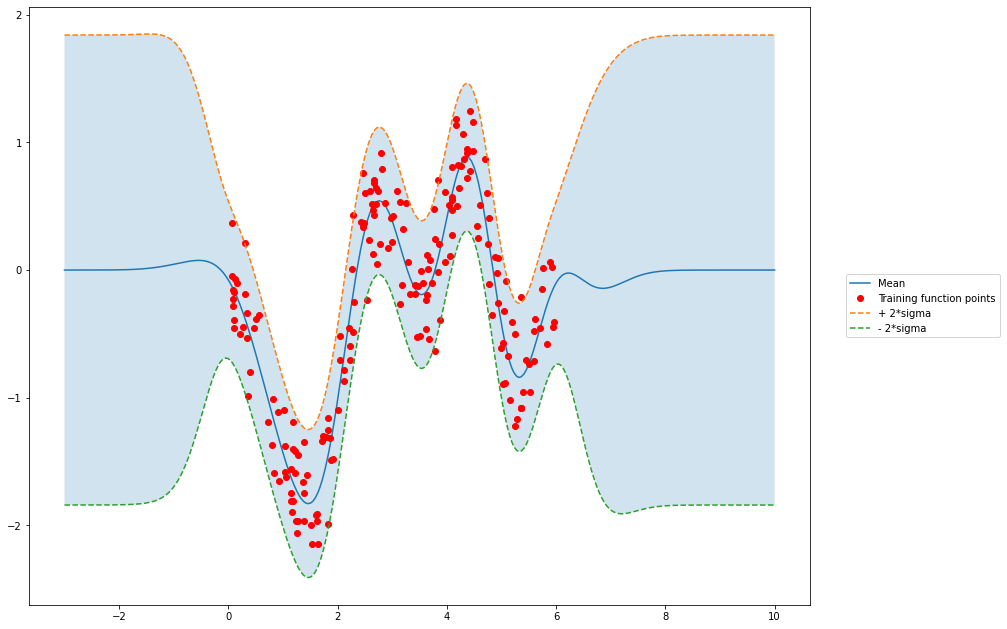

In [4]:
mu_s, cov_s = GP.predict(X_test, X_train, Y_train, theta=GP.theta, noise=GP.noise)

plot_gp(mu_s, cov_s, X_test, X_train=X_train, Y_train=Y_train)

# With different training size

### n = 20

In [5]:
sorted_idx = np.argsort(X_train.flatten())
n = X_train.shape[0]
X_train_sorted = X_train[sorted_idx]
Y_train_sorted = Y_train[sorted_idx]

X_train_20 = X_train_sorted[np.arange(1,n,10)]

Y_train_20 = Y_train_sorted[np.arange(1,n,10)]

GP = GP_regression()
GP.fit(X_train_20, Y_train_20, params0=np.array([1.0,1.0,0.3]),noise_estimation=True)

Optimization terminated successfully.
         Current function value: 17.408299
         Iterations: 11
         Function evaluations: 80
         Gradient evaluations: 20
Final negative log marginal likelihood: [17.4082987]


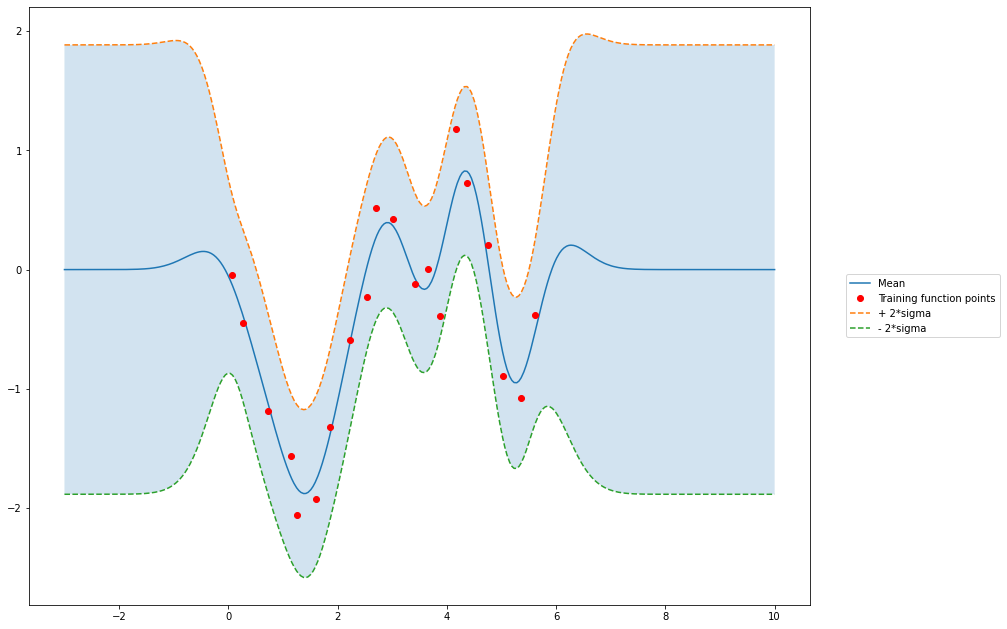

In [6]:
mu_s, cov_s = GP.predict(X_test, X_train_20, Y_train_20, theta=GP.theta, noise=GP.noise)

plot_gp(mu_s, cov_s, X_test, X_train=X_train_20, Y_train=Y_train_20)